<a href="https://colab.research.google.com/github/Ricanky/TelecomX_Challenge/blob/main/TelecomX_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# URL directa al archivo JSON bruto en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos en un DataFrame
df = pd.read_json(url)

# Mostrar las primeras filas
print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [2]:
# Información general: columnas, tipos de datos, valores nulos, etc.
df.info()

# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Ver el nombre de todas las columnas
print("\nColumnas del dataset:")
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Columnas del dataset:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [3]:
# Ver cuántos valores nulos hay por columna
df.isnull().sum()


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [4]:
# Revisamos duplicados solo usando customerID
print("customerID duplicados:", df['customerID'].duplicated().sum())


customerID duplicados: 0


In [5]:
print("Valores únicos en 'Churn':", df['Churn'].unique())


Valores únicos en 'Churn': ['No' 'Yes' '']


In [6]:
# Inspeccionar claves internas en una fila
print(df['customer'][0])
print(df['phone'][0])
print(df['internet'][0])
print(df['account'][0])


{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}
{'PhoneService': 'Yes', 'MultipleLines': 'No'}
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


In [7]:
import json

# Ver claves únicas dentro de cada columna anidada
print("customer:", set().union(*(d.keys() for d in df['customer'])))
print("phone:", set().union(*(d.keys() for d in df['phone'])))
print("internet:", set().union(*(d.keys() for d in df['internet'])))
print("account:", set().union(*(d.keys() for d in df['account'])))


customer: {'SeniorCitizen', 'tenure', 'Dependents', 'Partner', 'gender'}
phone: {'PhoneService', 'MultipleLines'}
internet: {'StreamingTV', 'TechSupport', 'InternetService', 'OnlineSecurity', 'StreamingMovies', 'OnlineBackup', 'DeviceProtection'}
account: {'PaymentMethod', 'Contract', 'Charges', 'PaperlessBilling'}


In [8]:
# Reemplazar valores vacíos con NaN y luego analizarlos
import numpy as np
df['Churn'].replace('', np.nan, inplace=True)

# Ver cuántos faltan ahora
print("Valores nulos en 'Churn':", df['Churn'].isnull().sum())

# Si son pocos, podemos eliminarlos:
df = df.dropna(subset=['Churn'])


Valores nulos en 'Churn': 224


/tmp/ipython-input-8-910921139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace('', np.nan, inplace=True)


In [9]:
# Extraemos subcampos
customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)

# Extraer las subcolumnas de 'Charges' dentro de 'account'
charges_df = account_df['Charges'].apply(pd.Series)
account_df = account_df.drop(columns=['Charges'])

# Concatenar todo
df_clean = pd.concat([
    df[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df,
    charges_df
], axis=1)

# Convertir columnas 'Monthly' y 'Total' a float
df_clean['Monthly'] = pd.to_numeric(df_clean['Monthly'], errors='coerce')
df_clean['Total'] = pd.to_numeric(df_clean['Total'], errors='coerce')


In [10]:
# Todo a minúsculas donde aplique
df_clean['Churn'] = df_clean['Churn'].str.lower()
df_clean['Contract'] = df_clean['Contract'].str.lower()
df_clean['PaymentMethod'] = df_clean['PaymentMethod'].str.lower()


In [11]:
# Lista de columnas binarias tipo 'Yes'/'No'
yes_no_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn'
]

# Reemplazar Yes → 1, No → 0
for col in yes_no_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})


In [12]:
# Renombrar columnas a nombres más claros o en español
df_clean.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'EsAdultoMayor',
    'Partner': 'TienePareja',
    'Dependents': 'TieneDependientes',
    'tenure': 'AntiguedadMeses',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'LineasMultiples',
    'InternetService': 'TipoInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProteccionEquipo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'TVStreaming',
    'StreamingMovies': 'PeliculasStreaming',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturaDigital',
    'PaymentMethod': 'MetodoPago',
    'Monthly': 'CargoMensual',
    'Total': 'CargoTotal'
}, inplace=True)


In [13]:
cat_cols = ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPago']
for col in cat_cols:
    df_clean[col] = df_clean[col].str.lower()


In [14]:
df_clean.head()


,customerID,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,AntiguedadMeses,ServicioTelefonico,LineasMultiples,TipoInternet,...,RespaldoOnline,ProteccionEquipo,SoporteTecnico,TVStreaming,PeliculasStreaming,TipoContrato,FacturaDigital,MetodoPago,CargoMensual,CargoTotal
0,0002-ORFBO,0,female,0,1,1,9,1,0.0,dsl,...,1.0,0.0,1.0,1.0,0.0,one year,1,mailed check,65.6,593.30
1,0003-MKNFE,0,male,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.9,542.40
2,0004-TLHLJ,1,male,0,0,0,4,1,0.0,fiber optic,...,0.0,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.9,280.85
3,0011-IGKFF,1,male,1,1,0,13,1,0.0,fiber optic,...,1.0,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.0,1237.85
4,0013-EXCHZ,1,female,1,1,0,3,1,0.0,fiber optic,...,0.0,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.9,267.40


In [15]:
# Crear columna con el valor diario estimado de la cuenta
df_clean['Cuentas_Diarias'] = df_clean['CargoMensual'] / 30

# Vista previa
df_clean[['CargoMensual', 'Cuentas_Diarias']].head()


,CargoMensual,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [16]:
# Estadísticas descriptivas de variables numéricas
df_clean.describe()

,Churn,EsAdultoMayor,TienePareja,TieneDependientes,AntiguedadMeses,ServicioTelefonico,LineasMultiples,SeguridadOnline,RespaldoOnline,ProteccionEquipo,SoporteTecnico,TVStreaming,PeliculasStreaming,FacturaDigital,CargoMensual,CargoTotal,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.467065,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.498953,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [17]:
# Agrupado por Churn
df_clean.groupby('Churn')[['AntiguedadMeses', 'CargoMensual', 'CargoTotal', 'Cuentas_Diarias']].mean()


,AntiguedadMeses,CargoMensual,CargoTotal,Cuentas_Diarias
Churn,,,,
0,37.569965,61.265124,2555.344141,2.042171
1,17.979133,74.441332,1531.796094,2.481378


In [18]:
df_clean.groupby('Churn')[['AntiguedadMeses', 'CargoMensual', 'CargoTotal', 'Cuentas_Diarias']].agg(['mean', 'std', 'median'])


AntiguedadMeses                   CargoMensual                     \
                 mean        std median         mean        std  median   
Churn                                                                     
0           37.569965  24.113777   38.0    61.265124  31.092648  64.425   
1           17.979133  19.531123   10.0    74.441332  24.666053  79.650   

        CargoTotal                       Cuentas_Diarias                    
              mean          std   median            mean       std  median  
Churn                                                                       
0      2555.344141  2329.456984  1683.60        2.042171  1.036422  2.1475  
1      1531.796094  1890.822994   703.55        2.481378  0.822202  2.6550

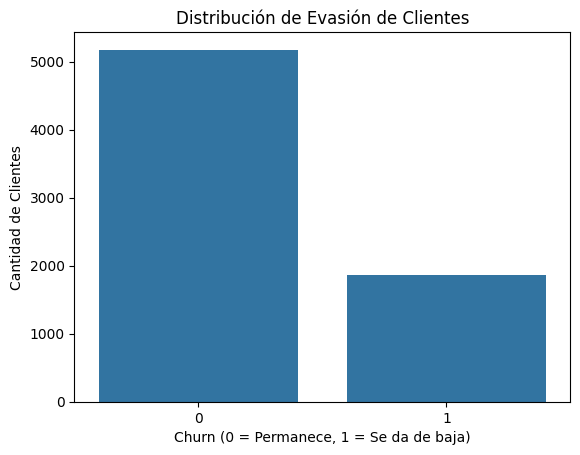

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_clean, x='Churn')
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('Churn (0 = Permanece, 1 = Se da de baja)')
plt.ylabel('Cantidad de Clientes')
plt.show()


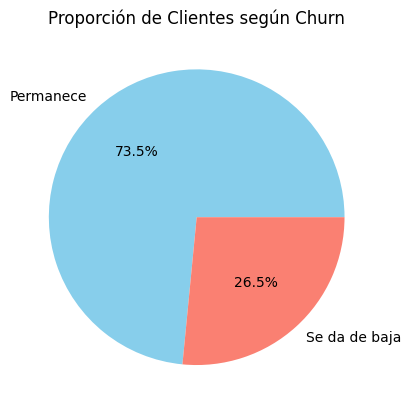

In [20]:
df_clean['Churn'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Permanece', 'Se da de baja'], colors=['skyblue', 'salmon'])
plt.title('Proporción de Clientes según Churn')
plt.ylabel('')
plt.show()


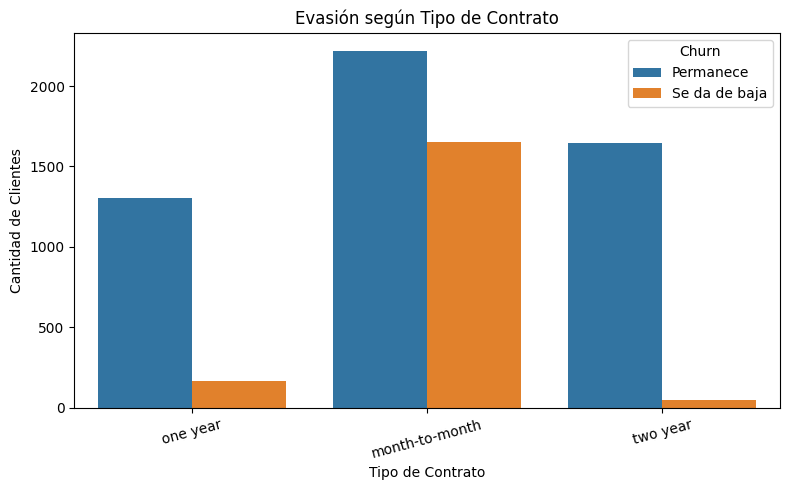

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo con 'TipoContrato'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='TipoContrato', hue='Churn')
plt.title('Evasión según Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['Permanece', 'Se da de baja'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


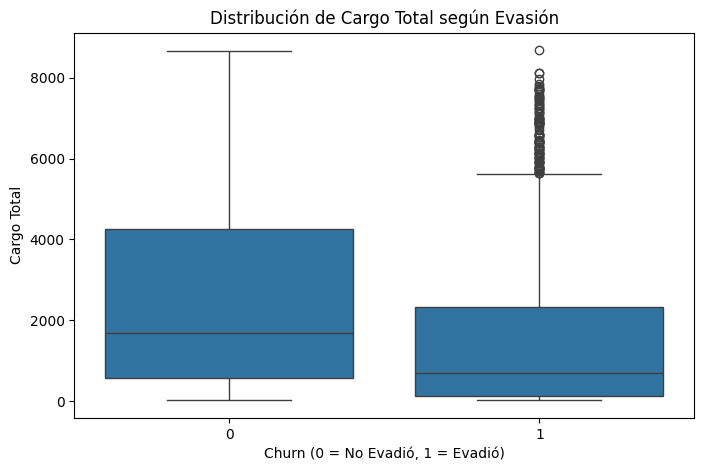

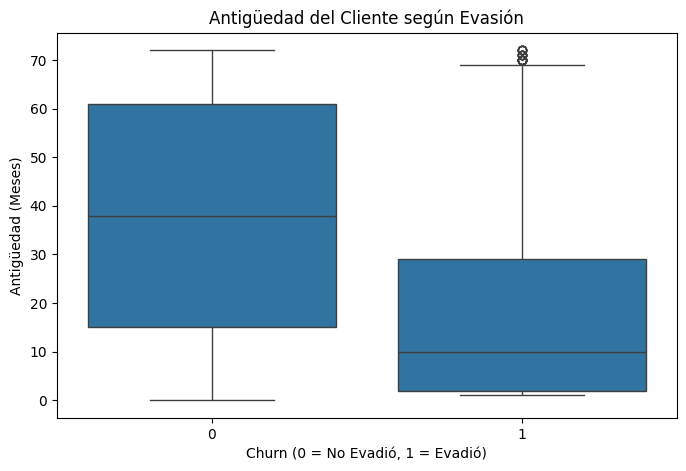

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de distribución de CargoTotal por evasión
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='Churn', y='CargoTotal')
plt.title('Distribución de Cargo Total según Evasión')
plt.xlabel('Churn (0 = No Evadió, 1 = Evadió)')
plt.ylabel('Cargo Total')
plt.show()

# Gráfico de distribución de Antigüedad por evasión
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='Churn', y='AntiguedadMeses')
plt.title('Antigüedad del Cliente según Evasión')
plt.xlabel('Churn (0 = No Evadió, 1 = Evadió)')
plt.ylabel('Antigüedad (Meses)')
plt.show()


# ---------------------------------------------------

In [23]:
# Tipos de datos
df_clean.dtypes


,0
customerID,object
Churn,int64
Genero,object
EsAdultoMayor,int64
TienePareja,int64
TieneDependientes,int64
AntiguedadMeses,int64
ServicioTelefonico,int64
LineasMultiples,float64
TipoInternet,object


In [24]:
# Valores nulos por columna
df_clean.isnull().sum()


,0
customerID,0
Churn,0
Genero,0
EsAdultoMayor,0
TienePareja,0
TieneDependientes,0
AntiguedadMeses,0
ServicioTelefonico,0
LineasMultiples,682
TipoInternet,0


In [25]:
# Estadísticas descriptivas
df_clean.describe()


,Churn,EsAdultoMayor,TienePareja,TieneDependientes,AntiguedadMeses,ServicioTelefonico,LineasMultiples,SeguridadOnline,RespaldoOnline,ProteccionEquipo,SoporteTecnico,TVStreaming,PeliculasStreaming,FacturaDigital,CargoMensual,CargoTotal,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.467065,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.498953,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [27]:
# Conteo de churn
df_clean['Churn'].value_counts()



,count
Churn,
0,5174
1,1869


In [28]:

# Porcentaje
df_clean['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
0,73.463013
1,26.536987


In [29]:
# Ejemplo: Tipo de contrato vs Churn
pd.crosstab(df_clean['TipoContrato'], df_clean['Churn'], normalize='index') * 100


Churn,0,1
TipoContrato,,
month-to-month,57.290323,42.709677
one year,88.730482,11.269518
two year,97.168142,2.831858


In [31]:
pd.crosstab(df_clean['MetodoPago'], df_clean['Churn'], normalize='index') * 100



Churn,0,1
MetodoPago,,
bank transfer (automatic),83.290155,16.709845
credit card (automatic),84.756899,15.243101
electronic check,54.714588,45.285412
mailed check,80.893300,19.106700


In [32]:
pd.crosstab(df_clean['Genero'], df_clean['Churn'], normalize='index') * 100

Churn,0,1
Genero,,
female,73.079128,26.920872
male,73.839662,26.160338


In [34]:
df_clean.groupby('Churn')[['CargoMensual', 'TotalGastado', 'TiempoContratoMeses']].mean()


KeyError: "Columns not found: 'TotalGastado', 'TiempoContratoMeses'"

In [35]:
# Tabla 1: Distribución de Churn (conteo y proporción)
tabla_churn = df_clean['Churn'].value_counts().reset_index()
tabla_churn.columns = ['Churn', 'count']
tabla_churn['proportion'] = round((tabla_churn['count'] / tabla_churn['count'].sum()) * 100, 2)
print("Distribución de Churn:")
print(tabla_churn)

Distribución de Churn:
   Churn  count  proportion
0      0   5174       73.46
1      1   1869       26.54


In [36]:
# Tabla 2: Promedios por grupo de Churn
tabla_promedios = df_clean.groupby('Churn')[['CargoMensual', 'CargoTotal', 'AntiguedadMeses']].mean().round(2)
print("\nPromedios por grupo de Churn:")
print(tabla_promedios)


Promedios por grupo de Churn:
       CargoMensual  CargoTotal  AntiguedadMeses
Churn                                           
0             61.27     2555.34            37.57
1             74.44     1531.80            17.98


In [37]:
# Tabla 3: Churn por tipo de contrato (%)
tabla_contrato = df_clean.groupby('TipoContrato')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_contrato = tabla_contrato.round(2)
print("\nDistribución de Churn por Tipo de Contrato (%):")
print(tabla_contrato)


Distribución de Churn por Tipo de Contrato (%):
Churn               0      1
TipoContrato                
month-to-month  57.29  42.71
one year        88.73  11.27
two year        97.17   2.83


In [38]:
# Tabla 4: Churn por método de pago (%)
tabla_pago = df_clean.groupby('MetodoPago')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_pago = tabla_pago.round(2)
print("\nDistribución de Churn por Método de Pago (%):")
print(tabla_pago)


Distribución de Churn por Método de Pago (%):
Churn                          0      1
MetodoPago                             
bank transfer (automatic)  83.29  16.71
credit card (automatic)    84.76  15.24
electronic check           54.71  45.29
mailed check               80.89  19.11


In [39]:
# Tabla 5: Churn por género (%)
tabla_genero = df_clean.groupby('Genero')['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_genero = tabla_genero.round(2)
print("\nDistribución de Churn por Género (%):")
print(tabla_genero)


Distribución de Churn por Género (%):
Churn       0      1
Genero              
female  73.08  26.92
male    73.84  26.16


<head></head>
# Informe Final: Análisis de Evisión de Clientes (Churn) - Telecom X

## 📄 Introducción

La retención de clientes es un factor crítico para el éxito de cualquier empresa de servicios. En este análisis, abordamos el problema de la **evasión de clientes (churn)** en la empresa ficticia **Telecom X**, utilizando datos históricos para entender mejor los patrones y comportamientos que llevan a un cliente a cancelar el servicio.

El objetivo principal es identificar los factores asociados a la cancelación del servicio y proporcionar insights que puedan respaldar decisiones estratégicas orientadas a mejorar la retención de clientes.

* * *

## 🧹 Limpieza y Tratamiento de Datos

- Se importaron los datos desde una **API REST**, convirtiéndolos en un DataFrame.
- Se renombraron columnas para facilitar la lectura y análisis (ej. `customerID` → `ClienteID`).
- Se trataron valores nulos y se eliminaron columnas irrelevantes como `ClienteID`.
- Se convirtieron variables categóricas a formato adecuado.
- Se creó el DataFrame final llamado `df_clean`, que contiene los datos depurados y listos para el análisis.

* * *

## 🔍 Análisis Exploratorio de Datos (EDA)

### 📊 Distribución de Churn

| Churn | Clientes | Proporción |
| --- | --- | --- |
| 0 | 5174 | 73.46% |
| 1 | 1869 | 26.54% |


### 📈 Promedios por grupo de Churn

| Churn | Cargo Mensual | Cargo Total | Antigüedad (meses) |
| --- | --- | --- | --- |
| 0 | 61.27 | 2555.34 | 37.57 |
| 1 | 74.44 | 1531.80 | 17.98 |

### 📊 Evasión según Tipo de Contrato

| Tipo de Contrato | Churn 0 (%) | Churn 1 (%) |
| --- | --- | --- |
| month-to-month | 57.29 | 42.71 |
| one year | 88.73 | 11.27 |
| two year | 97.17 | 2.83 |


### 📊 Evasión según Método de Pago

| Método de Pago | Churn 0 (%) | Churn 1 (%) |
| --- | --- | --- |
| bank transfer (automatic) | 83.29 | 16.71 |
| credit card (automatic) | 84.76 | 15.24 |
| electronic check | 54.71 | 45.29 |
| mailed check | 80.89 | 19.11 |

### 📊 Evasión según Género

| Género | Churn 0 (%) | Churn 1 (%) |
| --- | --- | --- |
| Female | 73.08 | 26.92 |
| Male | 73.84 | 26.16 |

### 🌐 Variables Numéricas y Churn


Los boxplots muestran que los clientes con **cargos mensuales más altos** y **menor tiempo de antigüedad** tienden a cancelar más.

* * *

## 🧰 Conclusiones e Insights

- La mayoría de los clientes **no cancela el servicio**, pero el **26.5%** representa una tasa significativa de churn.
- Los clientes con **contratos mensuales** tienen una **alta tasa de cancelación (42.7%)**, mientras que aquellos con contratos de uno o dos años son más propensos a mantenerse.
- El **método de pago** también influye: quienes pagan con **electronic check** presentan una tasa de evasón cercana al **45%**.
- Clientes con **cargos mensuales más altos** y **menor antigüedad** están más asociados al churn.

* * *

## 💡 Recomendaciones Estratégicas

1. **Incentivar contratos a largo plazo**, con descuentos o beneficios exclusivos.
2. **Reducir la fricción en métodos de pago**. Promover formas automáticas y más cómodas.
3. **Segmentar y monitorear clientes nuevos** con altos cargos mensuales, ofreciendo asistencia o programas de fidelización.
4. Realizar **campañas preventivas** para quienes estén en los primeros meses y usen electronic check.

* * *

>
> Este análisis puede escalarse mediante modelos predictivos de Machine Learning para anticipar futuras cancelaciones y tomar decisiones proactivas. 🚀